# Case 1: predicting house prices

        In the kernels below will I import in the data of past prices of recorded houses; render and compare 3 regression models; then enable pricing prediction based on customized inputs. I used the package turicreate to process the data and visualize them.
        * This is a course practice. The data and techniques were provided by the course 'Machine Learning Foundations: A Case Study Approach' by University of Washington, with decrpitons, visualization adjustments, and  table comparisons by myself.

In [1]:
pip install jedi==0.17.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import turicreate

## Import SFrame data

In [3]:
sales = turicreate.SFrame('home_data.sframe/')

In [4]:
sales.show

<bound method SFrame.show of Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 21613

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 7129300520 | 2014-10-13 00:00:00+00:00 |  221900.0 |   3.0    |    1.0    |
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000.0 |   3.0    |    2.25   |
| 5631500400 | 2015-02-25 00:00:00+00:00 |  180000.0 |   2.0    |    1.0    |
| 2487200875 | 2014-12-09 00:00:00+00:00 |  604000.0 |   4.0    |    3.0    |
| 1954400510 | 2015-02-18 00:00:00+00:00 |  510000.0 |   3.0    |    2.0  

In [23]:
turicreate.plot(sales[1:1000]['sqft_living'],sales[1:1000]['price'],xlabel='Living size',ylabel='Price',title='Size vs Price')

Materializing X axis SArray

Materializing Y axis SArray

## Building the regression models:
        Here will I first randomize the data into training set and test set. Using the trainings et to build the regression and use the test set to exmamine its accuracy.

In [10]:
training_set,test_set = sales.random_split(0.8, seed = 0)

In [20]:
sqft_model = turicreate.linear_regression.create(training_set,target = 'price',features=['sqft_living']) #can create a colum

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.008067     | 4290671.398393     | 4364316.198109       | 261352.127289                   | 291578.190094                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

## Evaluate how this model works

In [18]:
print('According to the sqft model, the mean is:', test_set['price'].mean()) 

According to the sqft model, the mean is: 543054.0425632538


In [22]:
print('the maximum error and root mean sqaure error are:',sqft_model.evaluate(test_set))

the maximum error and root mean sqaure error are: {'max_error': 4155250.144682809, 'rmse': 255170.23163945338}


In [ ]:
pip install matplotlib 

In [25]:
import matplotlib.pyplot as plt #another plotting tool, the inline code just makes the plot stays in notebook itself
%matplotlib inline 

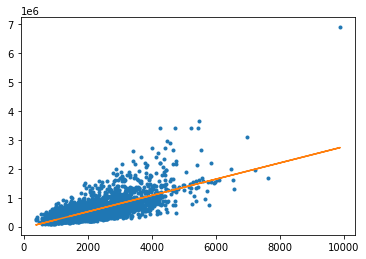

In [26]:
plt.plot(test_set['sqft_living'],test_set['price'],'.',test_set['sqft_living'],sqft_model.predict(test_set),'-')


# the '.' and '-' just means the shape of the plot

From the graph, 

In [27]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-44642.15005958057,5024.549034069017
sqft_living,None,280.5249752655988,2.2079544790631433


## add more parameters

In [ ]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [ ]:
sales[my_features].show()

it just shows the frequency above

In [ ]:
turicreate.show(sales[1:200]['zipcode'],sales[1:200]['price'])

## revise the regression model

In [ ]:
my_features_model = turicreate.regression.create(training_set, target = 'price', features = my_features )

In [ ]:
print(sqft_model.evaluate(test_set))
print(my_features_model.evaluate(test_set))

## apply to predict

In [ ]:
house1 = sales[sales['id']== '5309101200'] ##can use this to select any values

In [ ]:
house1

<img soure = ''>  to insert a pic

In [ ]:
print(house1['price'])

In [ ]:
print(sqft_model.predict(house1))

In [ ]:
print(my_features_model.predict(house1))

In [ ]:
house2 = sales[sales['id']=='1925069082']

In [ ]:
house2

In [ ]:
sqft_model.predict(house2)

In [ ]:
my_features_model.predict(house2)

In [ ]:
house2['price']

# customize the inputs

In [ ]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

in order to plug in, we need to express bill_gates as a 'matrx':turicreate.SFrame(bill_gates)

In [ ]:
my_features_model.predict(turicreate.SFrame(bill_gates))

In [ ]:
sqft_model.predict(turicreate.SFrame(bill_gates))